In [ ]:
def get_color_channel(image, channel):
    height, width = image[:,:,channel].shape
    rgb_array = np.zeros((height, width, 3), dtype=np.uint8)
    rgb_array[:, :, channel] = image[:,:,0]

    return Image.fromarray(rgb_array, mode='RGB')
    
def draw_on_color_channel(image, channel):
    height, width = image.shape
    rgb_array = np.zeros((height, width, 3), dtype=np.uint8)
    rgb_array[:, :, channel] = image[:,:]

    return Image.fromarray(rgb_array, mode='RGB')

def merge_RGB(R, G, B):
    height, width = image.shape
    rgb_array = np.zeros((height, width, 3), dtype=np.uint8)
    rgb_array[:, :, channel] = image[:,:]

    return Image.fromarray(rgb_array, mode='RGB')



In [2]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

plt.style.use('seaborn-v0_8-darkgrid')

In [3]:
def draw_compression_plot(original_image, compressed_image, R_channel, G_channel, B_channel, R_compressed, G_compressed, B_compressed):
    # plt.figure(figsize=(100, 100), facecolor='white')
    fig, axs = plt.subplots(3, 3, figsize=(20, 20))
    
    axs[0, 0].imshow(original_image)
    axs[0, 0].set_axis_off()
    axs[0, 1].imshow(compressed_image)
    axs[0, 1].set_axis_off()

    axs[1, 0].imshow(R_channel)
    axs[1, 0].set_axis_off()
    axs[1, 1].imshow(G_channel)
    axs[1, 1].set_axis_off()
    axs[1, 2].imshow(B_channel)
    axs[1, 2].set_axis_off()

    axs[2, 0].imshow(R_compressed)
    axs[2, 0].set_axis_off()
    axs[2, 1].imshow(G_compressed)
    axs[2, 1].set_axis_off()
    axs[2, 2].imshow(B_compressed)
    axs[2, 2].set_axis_off()
    fig.delaxes(axs[0, 2])
    return fig, axs

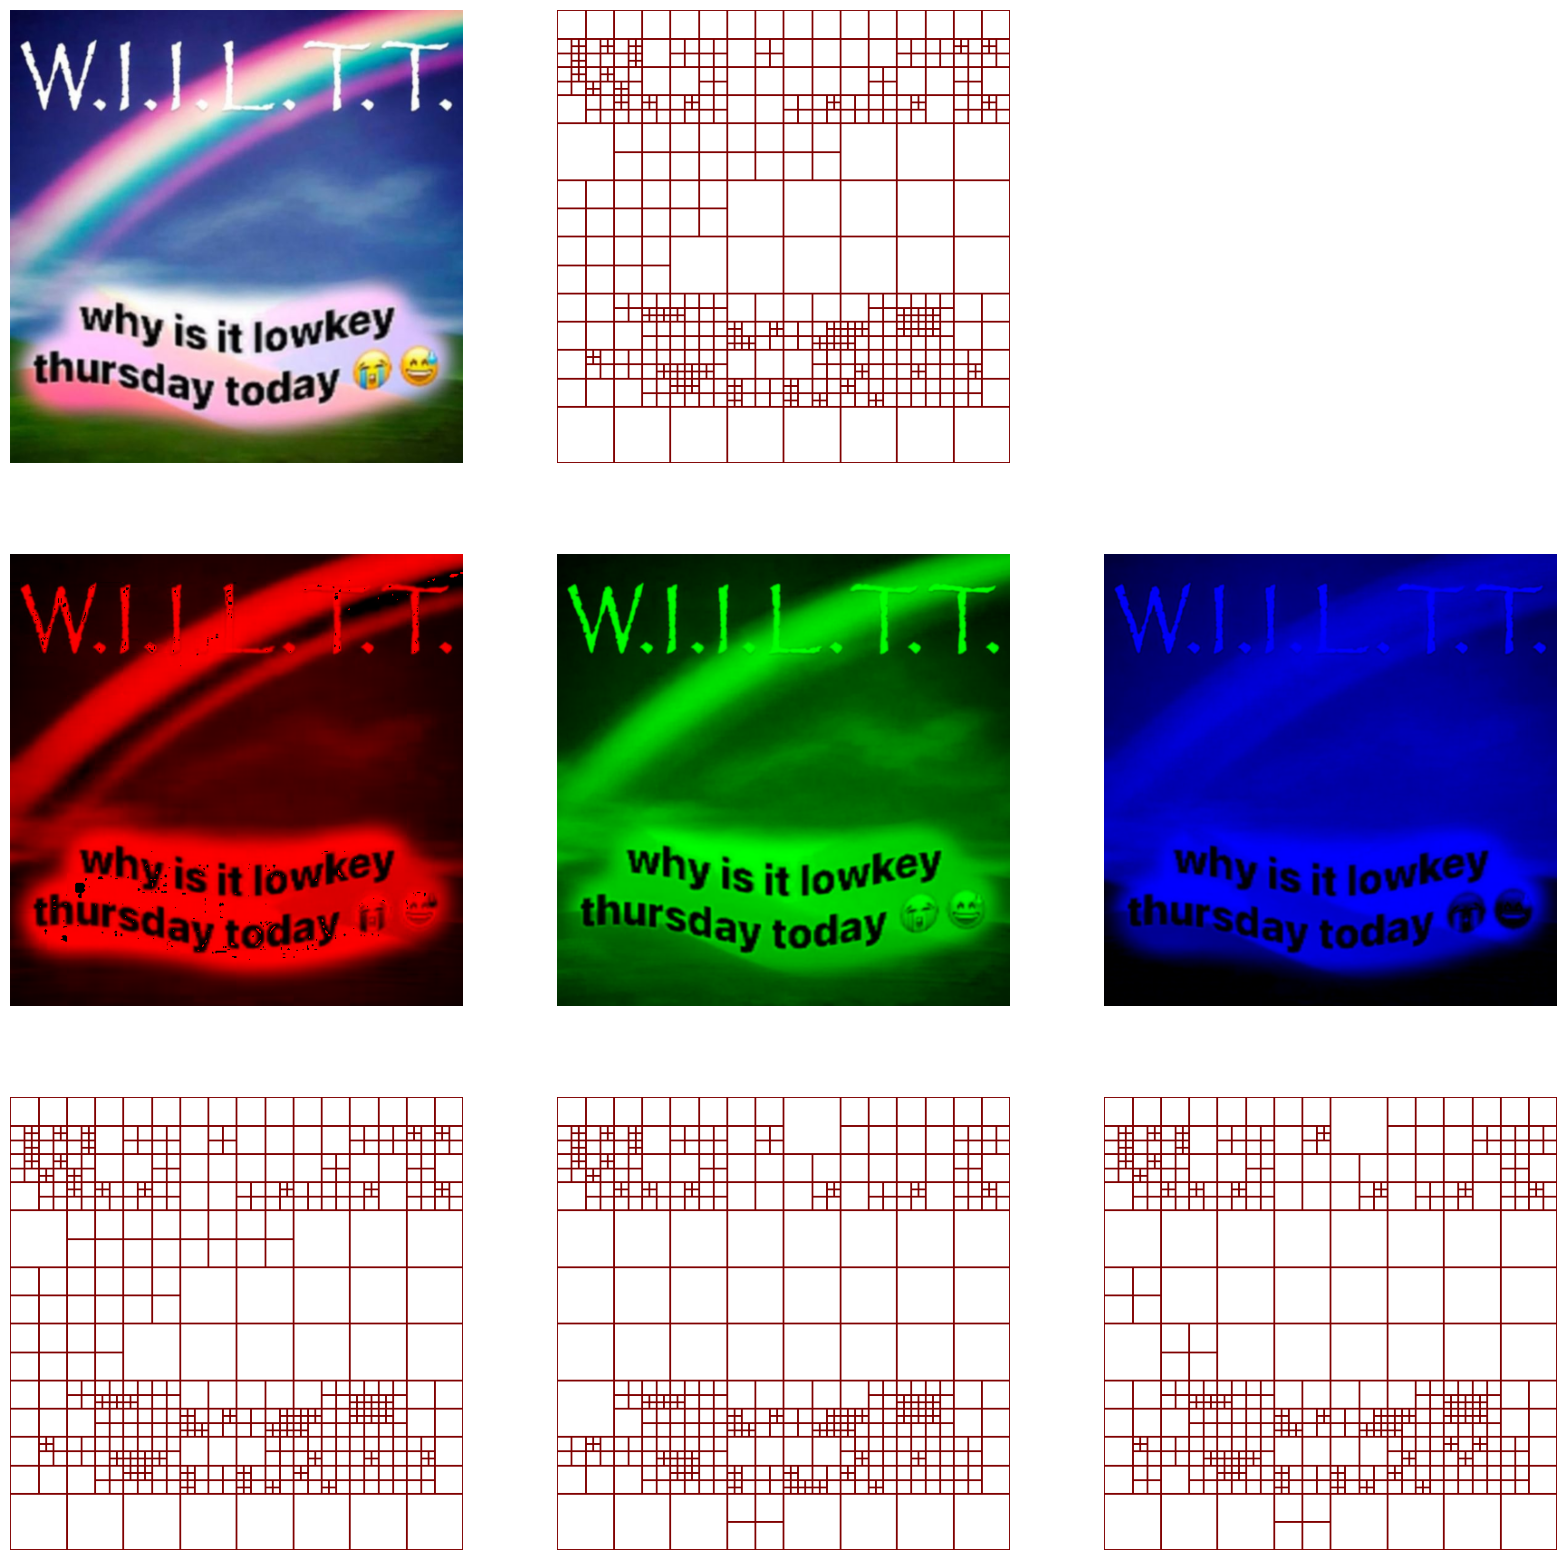

In [ ]:
import numpy as np
from scipy.linalg import svd
from compress import CompressMatrix, draw_vis, ReconstructMatrix

from PIL import Image
import matplotlib.pyplot as plt

IMAGEFILE = 'img.bmp'

image = Image.open(IMAGEFILE)
im_rgb = np.array(image)

R = im_rgb[:,:,0]
G = im_rgb[:,:,1]
B = im_rgb[:,:,2]

R_original = draw_on_color_channel(R, 0)
G_original = draw_on_color_channel(G, 1)
B_original = draw_on_color_channel(B, 2)

_, D, _ = svd(R)
# print(D)
R_compressed = CompressMatrix(R, 3, 100)
G_compressed = CompressMatrix(G, 3, 100)
B_compressed = CompressMatrix(B, 3, 100)

R_image = draw_vis(R_compressed)

G_image = draw_vis(G_compressed)

B_image = draw_vis(B_compressed)

R_rec = ReconstructMatrix(R_compressed, (500, 500))
G_rec = ReconstructMatrix(G_compressed, (500, 500))
B_rec = ReconstructMatrix(B_compressed, (500, 500))
merged = merge_RGB(reconstructed, 0)
_, _ = draw_compression_plot(image, 
                    merged, 
                    draw_on_color_channel(R_rec, 0), 
                    draw_on_color_channel(G_rec, 1),
                    draw_on_color_channel(B_rec, 2),
                    R_image, 
                    G_image, 
                    B_image)
plt.show()